# [Phystech@DataScience](https://thetahat.ru/courses/ph-ds-2025-spr)
## Домашнее задание 5

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_st_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания всем участникам списывания дается штраф -2 балла к итоговой оценке за семестр.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Обратите внимание на <a href="https://thetahat.ru/courses/ai-rules"><b>правила использования ИИ-инструментов</b></a> при решении домашнего задания.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Решение проверяется системой ИИ-проверки <a href="https://thetahat.ru/"><img src="https://miptstats.github.io/theta_grader_small.png" style="display: inline; vertical-align: middle;"></a> **ThetaGrader**. Результат проверки валидируется и исправляется человеком, после чего комментарии отправляются студентам.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

<b><font size="5" color="red">Важно!!! Правила заполнения ноутбука:</font></b>
* Запрещается удалять имеющиеся в ноутбуке ячейки, менять местами положения задач.
* Сохраняйте естественный линейный порядок повествования в ноутбуке сверху-вниз.
* Отвечайте на вопросы, а также добавляйте новые ячейки в предложенных местах, которые обозначены `<...>`.
* В markdown-ячейка, содержащих описание задачи, находятся специальные отметки, которые <font color="red"><b>запрещается модифицировать</b></font>.
* При нарушении данных правил работа может получить 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash;  80 баллов

<b><font color="orange">Cложная часть</font></b> (необходимо на "отл"):
* Задача 2 &mdash; 20 баллов
-----

In [ ]:
# Bot check

# HW_ID: phds_hw5
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, f1_score, mean_absolute_percentage_error, roc_auc_score

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
plt.style.use('classic')

import warnings
warnings.filterwarnings("ignore")

---
### Задача 1

#### <i>Профиль физика</i>
Набор данных суперсимметрии поддерживает двоичную классификацию событий столкновений в физике элементарных частиц на основе собранных особенностей столкновений. Вам будет необходимо научиться предсказывать вид события в зависимости от физических параметров частиц после столкновения.

Данные состоят из следующих функций:

- `target class` : метки классов, где 0 - фоновое событие, 1 - суперсимметричное событие.
- `L1pT` : импульс, поперечный лучу лептона 1
- `L1eta` : псевдобыстрота лептона 1
- `L1phi` : азимутальный угол лептона 1
- `L2pT` : импульс, поперечный лучу лептона 2
- `L2eta` : псевдобыстрота лептона 2
- `L2phi` : азимутальный угол лептона 2
- `missing energy magnitude` : количество недостающего поперечного импульса
- `missing energy phi` : азимутальный угол недостающего поперечного импульса
Остальные 10 признаков получены из первых 8 непосредственно измеренных признаков. Эти последние 10 функций — это функции, которые физики элементарных частиц разработали для улучшения своей задачи по обнаружению событий. Подробнее про оригинальное исследование можете посмотреть в прикрепленной статье.

Суперсимметрия — это теоретическая основа физики элементарных частиц, которая предлагает принцип симметрии, связывающий фермионы (частицы с полуцелым спином) и бозоны (частицы с целым спином). Эта инновационная теория вводит концепцию суперсимметричного партнера для каждой известной элементарной частицы, которая отличается по спину на 1/2, но имеет другие фундаментальные свойства, такие как заряд и масса.

#### <i>Профиль биология</i>
Набор данных включает 171 молекулу, предназначенную для функциональных доменов белка CRY1, ответственного за формирование циркадного ритма. 56 молекул токсичны, а остальные нетоксичны.

Полученные данные представляют собой полный набор из 1203 молекулярных дескрипторов.

---

Данное домашнее задание имеет свободную форму, то есть вашей задачей будет для каждого класса моделей получить лучший результат и после выбрать наилучшую модель. Метрика для задачи - `from sklearn.metrics import f1_score`. Работа будет оцениваться по следующим ключевым пунктам:


1.   Предвартельный анализ данных
2.   Предобработка данных
      -   Обработка пропусков
      -   Обработка выбросов

3.   Реализация моделей
      -  Дерево
      -  Логистическая регрессия
      -  KNN



#### 1. Предварительный анализ данных

В этом разделе ожидается, что вы посмотрите на распределение признаков и классов, изучите их связь, проанализируете признаки на наличие в них пропусков или выбросов.

In [5]:
df = pd.read_csv("hw5_phds_phys_data.csv")
df1 = df
df2 = df

df.shape

(300000, 19)

In [6]:
df.head(3)

,target class,L1pT,L1eta,L1phi,L2pT,L2eta,L2phi,missing energy magnitude,missing energy phi,MET_rel,axial MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos(theta_r1)
0,0.0,0.712592,0.776299,-0.977246,0.775582,0.546116,0.622289,0.282914,-0.637910,0.240377,0.594836,0.618827,0.399519,0.572907,0.000000,0.602655,0.057377,1.006094,0.005815
1,0.0,1.892328,-0.483967,0.856761,1.583623,0.419065,-1.217196,0.450840,-0.720053,0.525133,-0.129555,1.681192,1.076764,0.568355,1.079640,1.620158,1.083848,0.085631,0.200274
2,0.0,0.794814,-0.449250,-0.442333,0.661218,0.421613,0.360242,1.526186,-1.558715,0.622938,-0.883875,0.698650,1.359658,1.726974,2.710943,0.811192,2.078608,1.187547,0.222146


In [7]:
df.describe()

,target class,L1pT,L1eta,L1phi,L2pT,L2eta,L2phi,missing energy magnitude,missing energy phi,MET_rel,axial MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos(theta_r1)
count,300000.000000,270281.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,269976.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,3.000000e+05
mean,0.180617,0.806139,0.002342,-0.000382,0.931421,0.000674,0.004912,317.168176,0.001730,0.860035,-0.040169,0.909393,0.817755,0.968453,0.960499,0.912953,0.904408,0.990965,1.948868e-01
std,0.384701,0.505175,1.065371,1.003194,0.594539,1.054132,1.000748,2588.677366,1.001141,0.709926,0.732149,0.590783,0.407698,0.456871,0.786147,0.586717,0.557254,0.439444,1.770440e-01
min,0.000000,0.174402,-2.102801,-1.734789,0.428588,-2.059306,-1.734191,0.000720,-1.727112,0.000002,-9.570613,0.268493,0.006116,0.004674,0.000000,0.070768,0.004469,0.000016,1.498080e-07
25%,0.000000,0.506473,-0.837815,-0.868827,0.580922,-0.839517,-0.860624,0.420215,-0.864875,0.336958,-0.419683,0.540338,0.554099,0.625706,0.236615,0.551977,0.464411,0.670773,5.840420e-02
50%,0.000000,0.666549,0.003970,-0.005246,0.756538,0.001746,0.006563,0.665882,-0.006544,0.721962,-0.071250,0.739655,0.758104,0.903043,0.887005,0.748899,0.833992,1.084147,1.415535e-01
75%,0.000000,0.930683,0.842544,0.869711,1.062191,0.841115,0.872264,0.985724,0.870794,1.210727,0.280208,1.080284,0.996576,1.248131,1.531923,1.082994,1.264635,1.365324,2.818647e-01
max,1.000000,11.278777,2.101538,1.734833,16.929445,2.059696,1.734686,21999.968204,1.740689,12.754412,18.428970,14.689141,8.675550,4.819176,11.615088,14.734563,8.950393,1.591660,9.892850e-01


In [8]:
print(df.shape)
df.info()

(300000, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   target class              300000 non-null  float64
 1   L1pT                      270281 non-null  float64
 2   L1eta                     300000 non-null  float64
 3   L1phi                     300000 non-null  float64
 4   L2pT                      300000 non-null  float64
 5   L2eta                     300000 non-null  float64
 6   L2phi                     300000 non-null  float64
 7   missing energy magnitude  300000 non-null  float64
 8   missing energy phi        300000 non-null  float64
 9   MET_rel                   300000 non-null  float64
 10  axial MET                 300000 non-null  float64
 11  M_R                       300000 non-null  float64
 12  M_TR_2                    269976 non-null  float64
 13  R                         30000

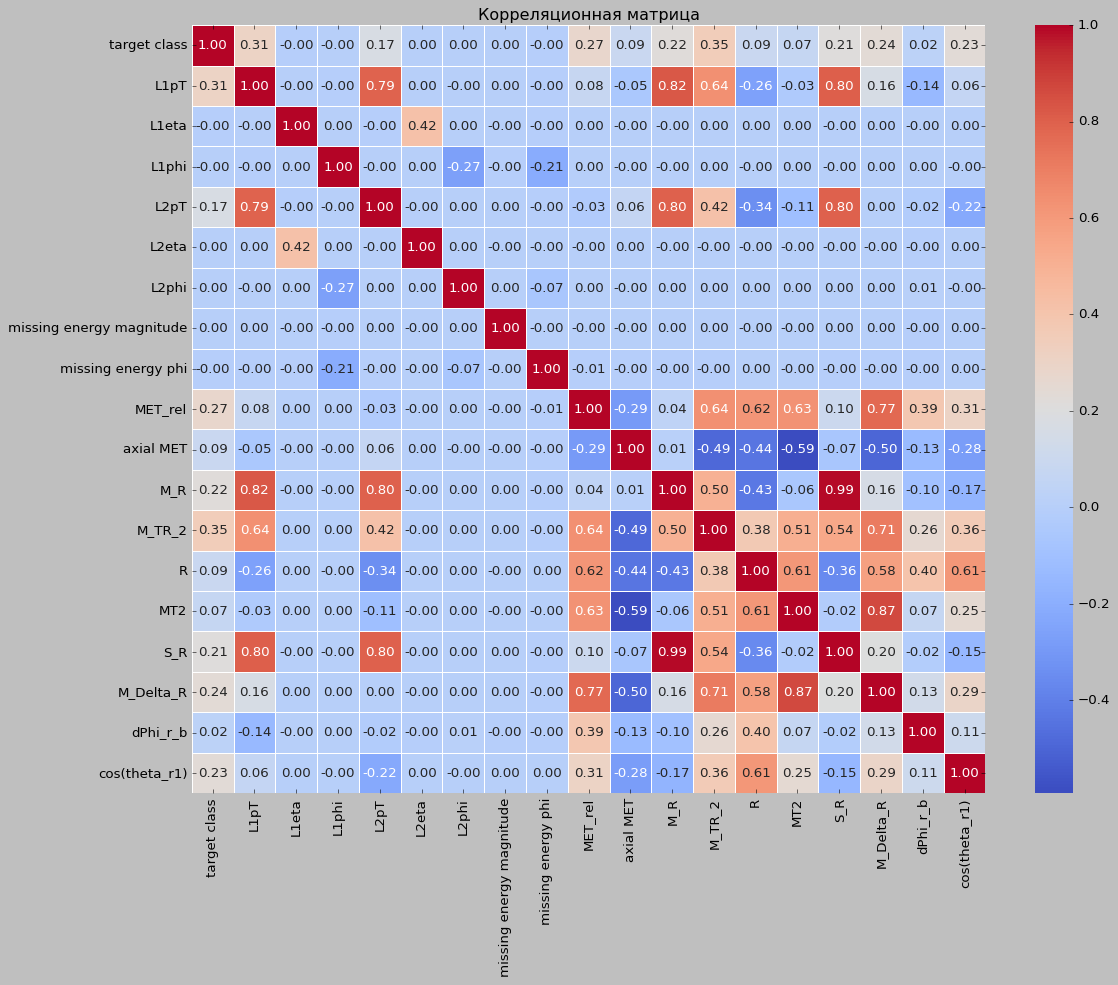

In [9]:
target_column = "target class"
numeric_df = df.select_dtypes(include="number")

plt.figure(figsize=(16, 12))
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Корреляционная матрица")
plt.show()


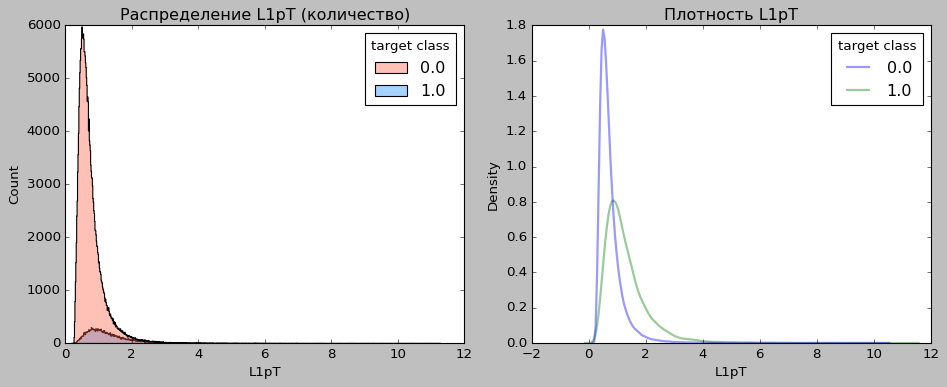

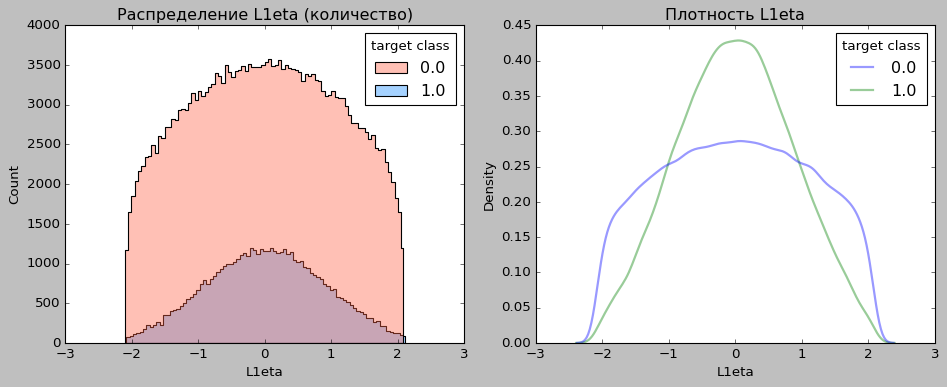

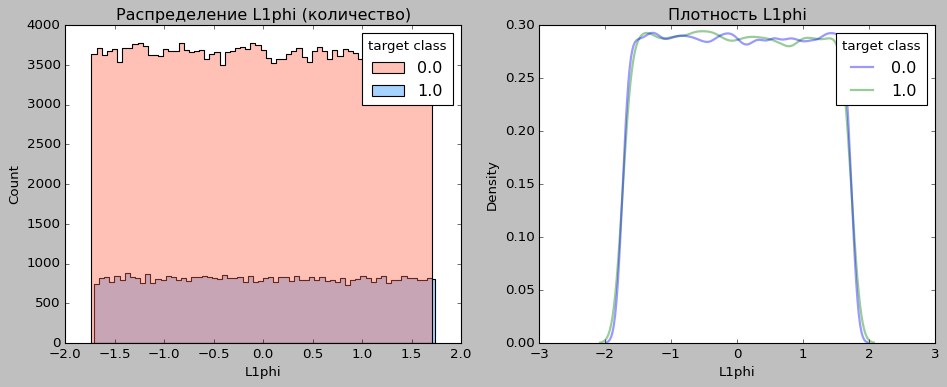

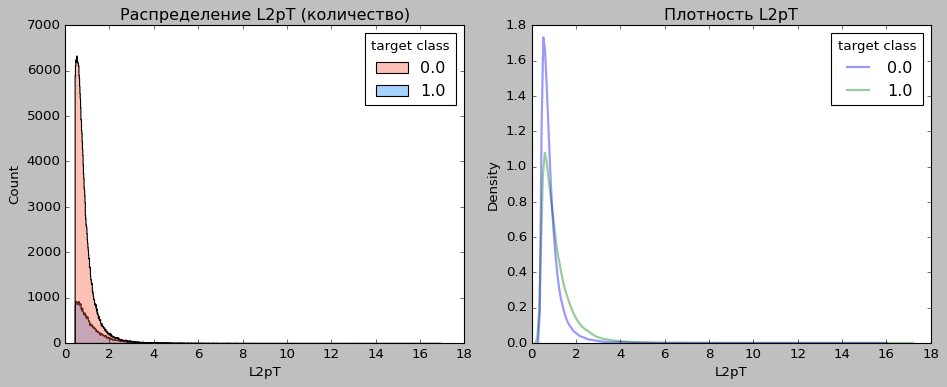

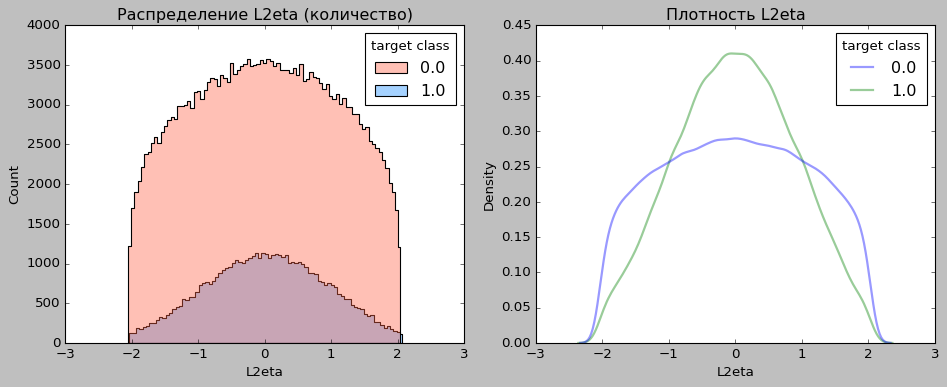

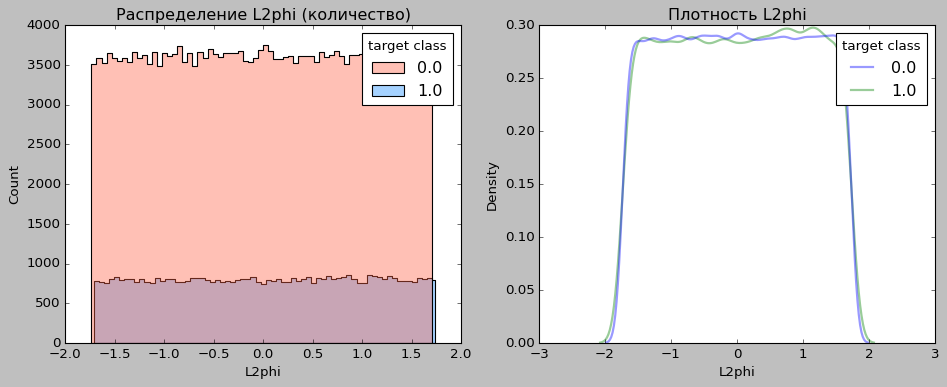

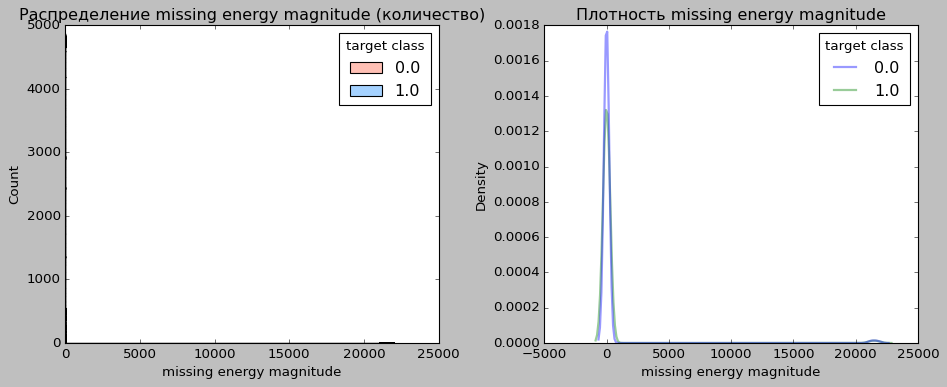

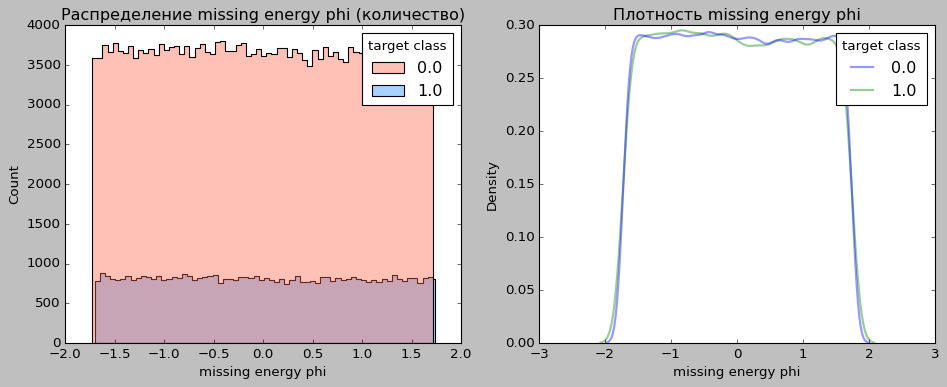

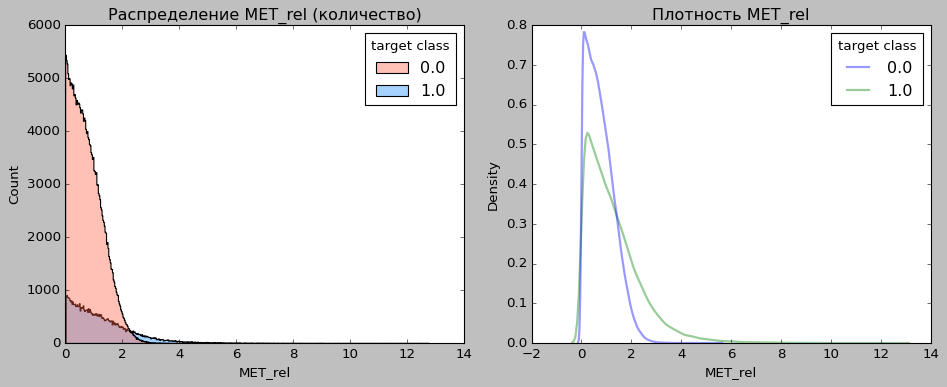

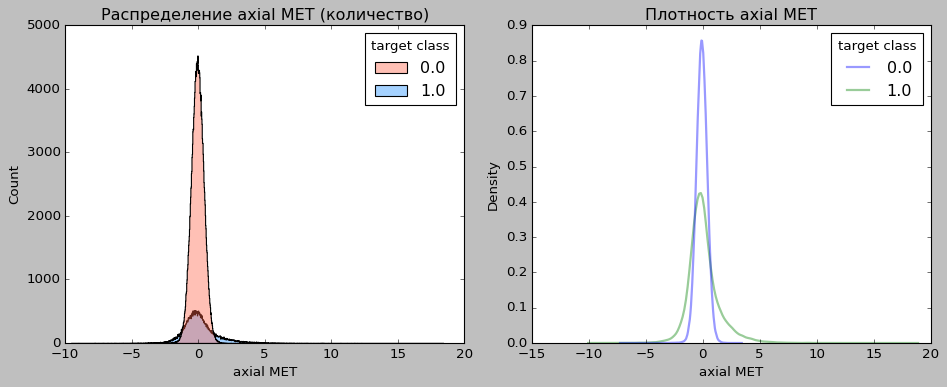

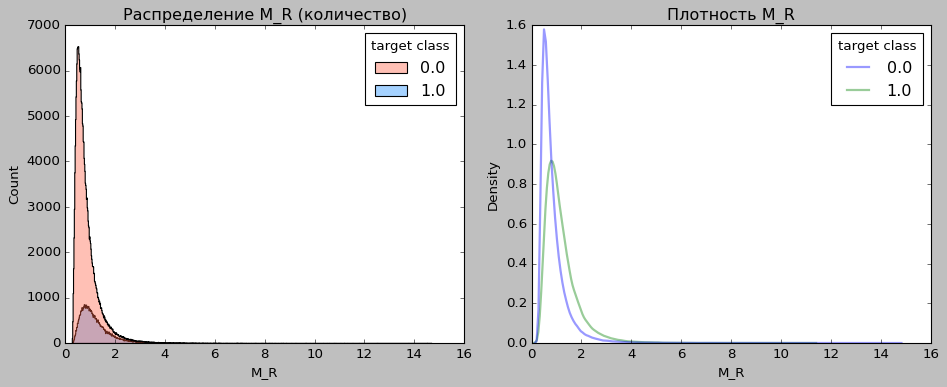

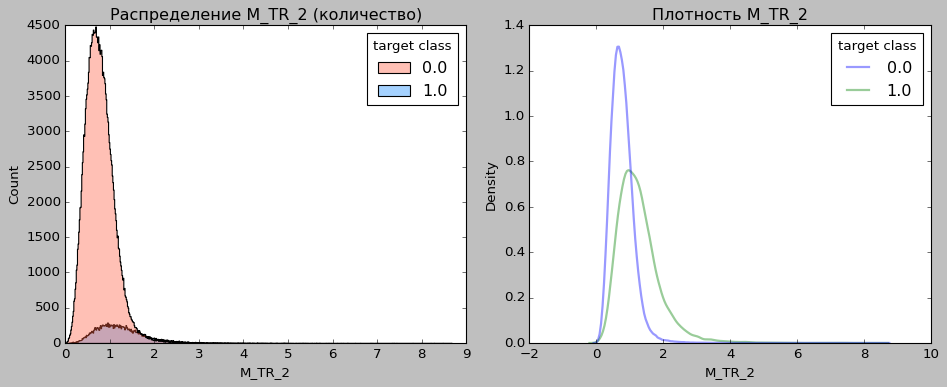

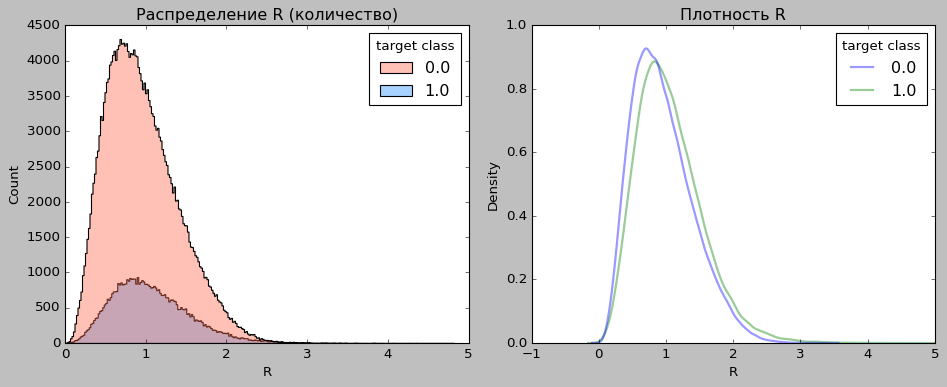

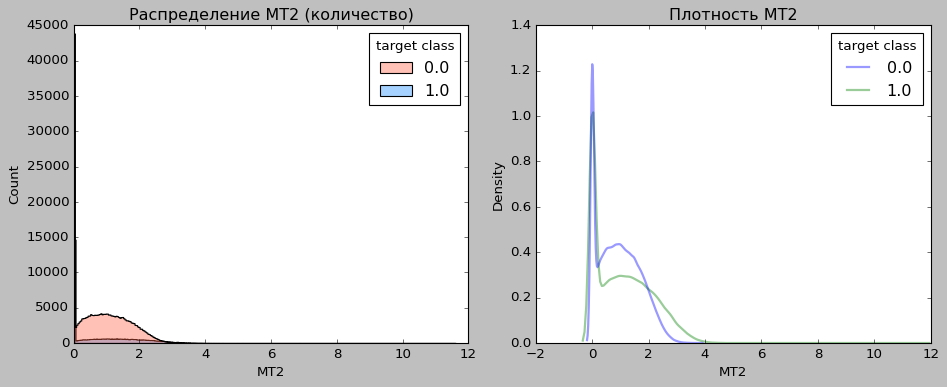

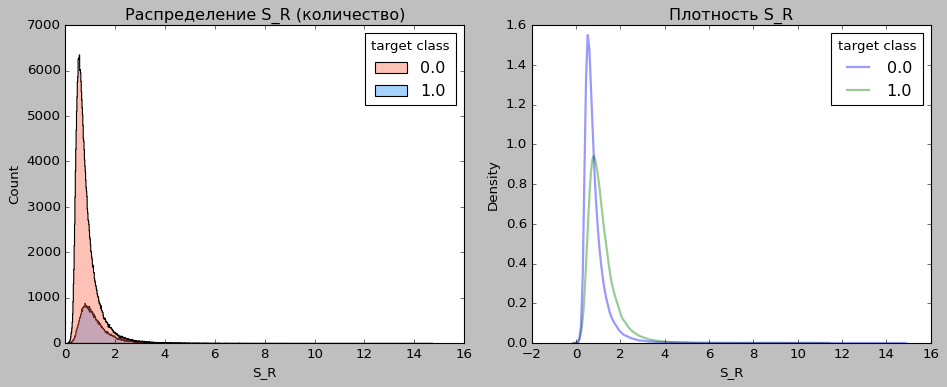

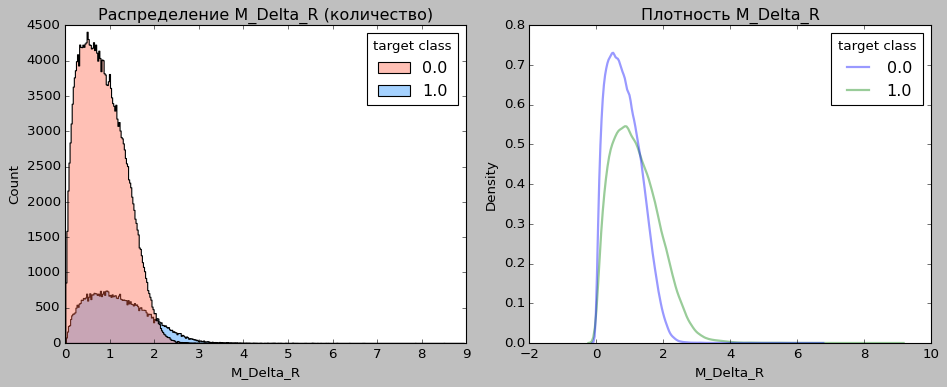

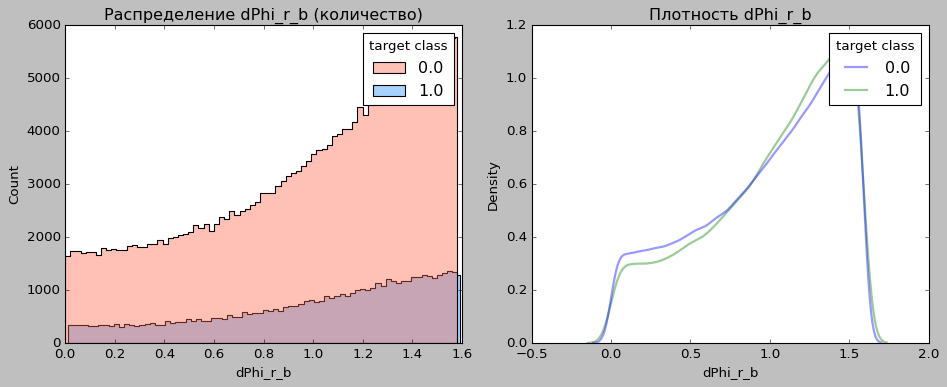

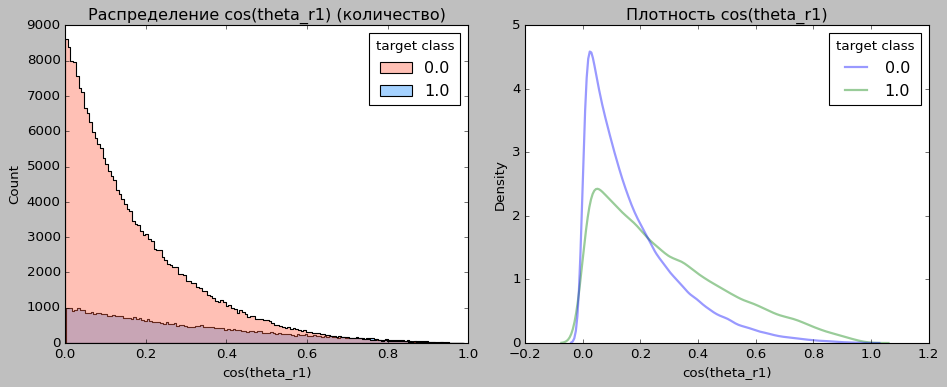

In [ ]:
for feature in numeric_df.columns:
    if feature != target_column:
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        sns.histplot(
            data=df,
            x=feature,
            hue=target_column,
            element="step",
            stat="count",
            alpha=0.4,
            palette={0: "tomato", 1: "dodgerblue"},
            multiple="dodge",
            edgecolor="black"
        )
        plt.title(f"Распределение {feature} (количество)")

        plt.subplot(1, 2, 2)
        sns.kdeplot(
            data=df,
            x=feature,
            hue=target_column,
            common_norm=False,
            fill=False,
            alpha=0.4,
            linewidth=2
        )
        plt.title(f"Плотность {feature}")

        plt.tight_layout()
        plt.show()

**Выводы:** матрица корреляции показывает, что мультиколлинеарность присутствует (например S_R и M_R почти совпадают), но большинство признаков почти не зависимы. По длинным хвостам на графиках (M_Delta_R, S_R, MT2, R, M_TR_2 ...) распределений и большим разницам значений 75% и max в describe (missing energy magnitude) видно, что выбросы есть. info также показало пропуски в данных (L1pT, M_TR_2). Попробуем заполнить пропуски и выбросы (определим их отклонением в 3 сигмы) моделью и медианными значениями.

#### 2. Предобработка данных

В этом разделе ожидается, что вы обработаете пропуски (если они есть) с помощью линейной регрессии, а выбросы (если они есть) обработайте способом на ваше усмотрение. Для оценки качества обработки пропусков используйте метрику MAPE.

In [ ]:
numeric_cols = df.select_dtypes(include=['number']).columns
df = df.dropna(axis=0)

df1[numeric_cols] = df1[numeric_cols].fillna(df1[numeric_cols].median())

df2[numeric_cols] = df2[numeric_cols].fillna(df[numeric_cols].mean())


In [ ]:
missing_cols = df.columns[df.isnull().any()].tolist()

for col in missing_cols:
    if df[col].isnull().sum() == 0:
        continue

    train_data = df.dropna(subset=[col])
    test_data = df[df[col].isnull()]

    X_train = train_data.drop(columns=[col])
    y_train = train_data[col]
    X_test = test_data.drop(columns=[col])

    model = LinearRegression()
    model.fit(X_train, y_train)
    df.loc[df[col].isnull(), col] = model.predict(X_test)

In [ ]:
df1.describe()

,target class,L1pT,L1eta,L1phi,L2pT,L2eta,L2phi,missing energy magnitude,missing energy phi,MET_rel,axial MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos(theta_r1)
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,3.000000e+05
mean,0.180617,0.792311,0.002342,-0.000382,0.931421,0.000674,0.004912,317.168176,0.001730,0.860035,-0.040169,0.909393,0.811785,0.968453,0.960499,0.912953,0.904408,0.990965,1.948868e-01
std,0.384701,0.481310,1.065371,1.003194,0.594539,1.054132,1.000748,2588.677366,1.001141,0.709926,0.732149,0.590783,0.387173,0.456871,0.786147,0.586717,0.557254,0.439444,1.770440e-01
min,0.000000,0.174402,-2.102801,-1.734789,0.428588,-2.059306,-1.734191,0.000720,-1.727112,0.000002,-9.570613,0.268493,0.006116,0.004674,0.000000,0.070768,0.004469,0.000016,1.498080e-07
25%,0.000000,0.522769,-0.837815,-0.868827,0.580922,-0.839517,-0.860624,0.420215,-0.864875,0.336958,-0.419683,0.540338,0.577575,0.625706,0.236615,0.551977,0.464411,0.670773,5.840420e-02
50%,0.000000,0.666549,0.003970,-0.005246,0.756538,0.001746,0.006563,0.665882,-0.006544,0.721962,-0.071250,0.739655,0.758104,0.903043,0.887005,0.748899,0.833992,1.084147,1.415535e-01
75%,0.000000,0.888663,0.842544,0.869711,1.062191,0.841115,0.872264,0.985724,0.870794,1.210727,0.280208,1.080284,0.963738,1.248131,1.531923,1.082994,1.264635,1.365324,2.818647e-01
max,1.000000,11.278777,2.101538,1.734833,16.929445,2.059696,1.734686,21999.968204,1.740689,12.754412,18.428970,14.689141,8.675550,4.819176,11.615088,14.734563,8.950393,1.591660,9.892850e-01


In [ ]:
def replace_outliers_with_median(df, n_sigmas=3):
    df_clean = df.copy()
    for col in df.select_dtypes(include='number').columns:
        median = df_clean[col].median()
        std = df_clean[col].std()
        lower_bound = median - n_sigmas * std
        upper_bound = median + n_sigmas * std
        outliers_mask = (df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)
        df_clean[col] = np.where(outliers_mask, median, df_clean[col])
    return df_clean

df_final = replace_outliers_with_median(df, 3)
df1_final = replace_outliers_with_median(df1, 3)
df2_final = replace_outliers_with_median(df2, 3)

In [ ]:
df1_final.describe()

,target class,L1pT,L1eta,L1phi,L2pT,L2eta,L2phi,missing energy magnitude,missing energy phi,MET_rel,axial MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos(theta_r1)
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,3.000000e+05
mean,0.180617,0.740661,0.002342,-0.000382,0.866552,0.000674,0.004912,0.785035,0.001730,0.810866,-0.074972,0.848524,0.783093,0.955352,0.950952,0.853209,0.886776,0.990965,1.805198e-01
std,0.384701,0.326184,1.065371,1.003194,0.399781,1.054132,1.000748,0.629489,1.001141,0.584824,0.557565,0.422709,0.306429,0.434244,0.770285,0.420573,0.523083,0.439444,1.535427e-01
min,0.000000,0.174402,-2.102801,-1.734789,0.428588,-2.059306,-1.734191,0.000720,-1.727112,0.000002,-2.266950,0.268493,0.006116,0.004674,0.000000,0.070768,0.004469,0.000016,1.498080e-07
25%,0.000000,0.522769,-0.837815,-0.868827,0.580922,-0.839517,-0.860624,0.420215,-0.864875,0.336958,-0.413091,0.540338,0.577575,0.625706,0.236615,0.551977,0.464411,0.670773,5.840420e-02
50%,0.000000,0.666549,0.003970,-0.005246,0.756536,0.001746,0.006563,0.665882,-0.006544,0.721959,-0.071250,0.739655,0.758104,0.903040,0.887005,0.748897,0.833991,1.084147,1.415528e-01
75%,0.000000,0.853912,0.842544,0.869711,1.020524,0.841115,0.872264,0.960770,0.870794,1.173499,0.256992,1.035396,0.943949,1.233932,1.521580,1.040206,1.247218,1.365324,2.644613e-01
max,1.000000,2.110457,2.101538,1.734833,2.540122,2.059696,1.734686,18.344038,1.740689,2.851722,2.124808,2.511987,1.919557,2.273652,3.245441,2.509031,2.505701,1.591660,6.726350e-01


#### 3. Обучение моделей

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV

In [ ]:
#для теста используйте 30% выборки, размер валидационной выборки выберите на ваше усмотрение
X = df1.drop(columns=["target class"])
y = df1["target class"]

X_1, X_test, y_1, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

##### DecisionTreeClassifier

In [ ]:
param_grid = {
    "max_depth": [5, 8, 12],
    "min_samples_split": [3, 5, 10],
}

grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    scoring='f1',
    cv=None,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

y_pred = grid_search.predict(X_valid)

f1 = f1_score(y_valid, y_pred)

print("Лучшие параметры:", grid_search.best_params_)
print(f"F1-score: {f1:.2f}")


Лучшие параметры: {'max_depth': 12, 'min_samples_split': 10}
F1-score: 0.92


**Выводы:** полученный результат метрики очень хороший, он заметно больше полученного при использовании датасета, из которого удалялись все данные с пропусками (f1 = 0.4), что подтверждает успешность проведенной обработки данных

##### LogisticRegression

In [ ]:
param_grid = {
    "C": [0.1, 1, 10],
    "penalty": ["l1", "l2"],
}

grid_search = GridSearchCV(
    estimator=LogisticRegression(random_state=42, max_iter=1000),
    param_grid=param_grid,
    scoring="f1",
    cv=None,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

y_pred = grid_search.predict(X_valid)

f1 = f1_score(y_valid, y_pred)

print("Лучшие параметры:", grid_search.best_params_)
print(f"F1-score: {f1:.2f}")

Лучшие параметры: {'C': 10, 'penalty': 'l2'}
F1-score: 0.48


**Выводы:** модель предпочитает слабую регуляризацию из-за отстуствия стандартизации. Даже так результат плохой, вероятно присутствуют сильные нелинейные связи, определяющие таргет, с которыми модель не может справиться, а также мультиколлинеарность, негативно влияющая на рассчет обратной матрицы регрессии

##### KNeighborsClassifier

In [ ]:
param_grid = {
    "n_neighbors": [3, 5, 7, 15],
}

# Создаем GridSearchCV
grid_search = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    scoring="f1",
    cv=None,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

y_pred = grid_search.predict(X_valid)

f1 = f1_score(y_valid, y_pred)

print("Лучшие параметры:", grid_search.best_params_)
print(f"F1-score: {f1:.2f}")

Лучшие параметры: {'n_neighbors': 3}
F1-score: 0.58


**Выводы:** модель ближайших соседей плохо справилась с задачей, вероятно из-за отстуствии стандартизации. Оптимальный параметра в 3 соседа при таком количестве данных, очень мал и говорит о вероятной несостоятельности модели

#### 4. Анализ полученных результатов и выводы по задаче

**Выводы:** датасет большой, обучение моделей требует большое количество времени. С заадчей всправилось только дерево, тк оно менее чувствительно к выбросам, мультиколлинеарности, стандартизации, и нелинейности связей

---
### Задача 2

В этой задаче вам нужно будет реализовать оптимальный подсчет метрики **ROC-AUC**. Вспомним, что **ROC** &mdash; кривая в координатах **True Positive Rate (TPR)** и **False Positive Rate (FPR)**, а **ROC-AUC** &mdash; площадь под этой кривой.

**TPR (True Positive Rate, полнота)** показывает какую долю объектов положительного класса модель классифицировала правильно:

$$TPR = \dfrac{TP}{TP + FN}$$


**FPR (False Positive Rate)** показывает, какую долю из объектов негативного класса модель предсказала неверно:

$$FPR = \dfrac{FP}{FP + TN}$$

1. Предложите алгоритм расчета метрики за $\mathcal{O} \left(n \log n\right)$, где $n$ &mdash; размер выборки.  
    *Подсказка.* Подумайте сколько всего различных пар $\left(FPR, TPR\right)$ существует.

    <...>

2. Реализуйте предложенный алгоритм.

In [ ]:
def roc_auc(y_true, y_score):
    '''
    Вычисляет ROC-AUC за O(n log(n))
    :param y_true: истинные бинарные метки
    :param y_score: предсказанная вероятность положительного класса
    '''
    <...>

    return auc


Для самопроверки:

In [ ]:
assert roc_auc([1, 0, 1, 1, 1], [0, 0.3, 0.2, 0, 0.5]) == 0.25